In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "P3MQ3ayVg8FUYdT2FR8VzyJSD"
consumer_secret = "qRUENCzWYTo7xlZZ52V0Yo0Iu3ZVIkmXWatATmbc8nl9gOjidC"
access_token = "127870883-Hoq5NBdBBYw8c3M3kFNDVSFwMG047XGdZ8eIllXG"
access_token_secret = "OUdwPgI9Mi3YRhyyDgq8Zqw7sLBYF4AajAHmpoaaLwsvX"

In [2]:

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

In [3]:
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}
for x in range(5):

    # Loop through all news sources
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)

        # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [4]:
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
tweet_df.to_csv("analysis/" + file_name, encoding="utf-8")

# Visualize the DataFrame
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,"8 people killed, 25 wounded in bloody weekend ...",Tue May 29 00:09:27 +0000 2018,-0.8126,0.000,0.519,0.481
1,Fox News,A Purple Heart recipient is sharing his story ...,Tue May 29 00:06:25 +0000 2018,-0.2023,0.205,0.560,0.235
2,Fox News,".@kayleighmcenany: ""What was degrading to Amer...",Tue May 29 00:00:13 +0000 2018,-0.8225,0.000,0.664,0.336
3,Fox News,".@kayleighmcenany: ""Both Chelsea and [@Hillary...",Mon May 28 23:52:48 +0000 2018,-0.6997,0.000,0.707,0.293
4,Fox News,Alberto maintains strength as it makes landfal...,Mon May 28 23:43:30 +0000 2018,0.4939,0.225,0.775,0.000


In [5]:
tweet_df.count()

tweet_source         500
tweet_text           500
tweet_date           500
tweet_vader_score    500
tweet_pos_score      500
tweet_neu_score      500
tweet_neg_score      500
dtype: int64

In [6]:
tweet_df["tweet_source"].unique()

array(['Fox News', 'CNN', 'BBC News (World)', 'CBS News',
       'The New York Times'], dtype=object)

In [8]:
tweet_df["tweet_date"] = pd.to_datetime(tweet_df["tweet_date"])

# Sort the dataframe by date
tweet_df.sort_values("tweet_date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

# Preview the data to confirm data is sorted
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,BBC News (World),Migrant crisis: Smugglers 'shot escaping migra...,2018-05-26 16:40:08,-0.7430,0.088,0.438,0.474
1,BBC News (World),Harvey Weinstein: What next after first charge...,2018-05-26 17:03:30,-0.2732,0.000,0.792,0.208
2,BBC News (World),RT @BBCBreaking: Official result: Republic of ...,2018-05-26 17:18:47,-0.5423,0.051,0.783,0.166
3,BBC News (World),Irish abortion referendum: Ireland overturns a...,2018-05-26 17:22:04,-0.5574,0.000,0.660,0.340
4,BBC News (World),RT @BBCNews: The moment it was confirmed that ...,2018-05-26 17:31:33,0.0000,0.000,1.000,0.000


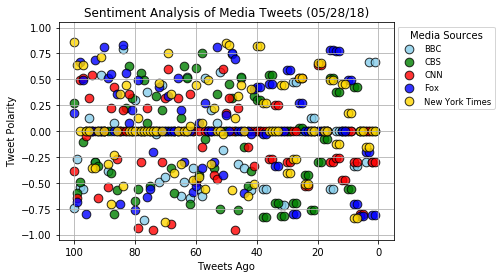

In [9]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="b", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

In [10]:
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
pd.DataFrame(tweet_df_polarity)

,tweet_vader_score
tweet_source,
BBC News (World),-0.064097
CBS News,-0.086311
CNN,-0.069249
Fox News,0.037861
The New York Times,0.050765


C:\Users\vaish\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


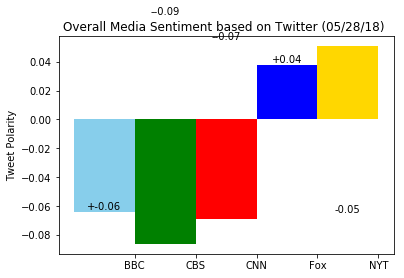

In [11]:
tweets_polarity = (tweet_df_polarity["BBC News (World)"], 
                    tweet_df_polarity["CBS News"], 
                    tweet_df_polarity["CNN"], 
                    tweet_df_polarity["Fox News"],
                    tweet_df_polarity["The New York Times"])

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="skyblue")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="green")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="red")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='blue')
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='gold')

# Generate labels for each news source
def autolabelpos(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '+%.2f' % float(height),
                ha='center', va='bottom')

def autolabelneg(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')
    
autolabelpos(rect1)
autolabelneg(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

# Orient widths, add labels, tick marks, etc. 
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)
ax.grid(False)

# Save Figure
file_name = str(time.strftime("%m-%d-%y")) + "-Fig2.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show Figure
fig.show()